In [1]:
import sys
import warnings
warnings.filterwarnings(action='ignore')
import collections
from IPython.display import display
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager, rc
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

mpl.rcParams['axes.unicode_minus'] = False
font_fname = '/Users/seongdae/Library/Fonts/NanumGothicLight.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()

rc('font', family=font_name)
# size, family
print ('font size : '+str(plt.rcParams['font.size']) )
print ('font family : '+str(plt.rcParams['font.family']) )
# import default setting
print('python version : {0}\npandas version : {1}\nmatplotlib version : {2}\nnumpy version : {3}\n'
.format(sys.version, pd.__version__, mpl.__version__, np.__version__))

font size : 10.0
font family : ['NanumGothic']
python version : 3.7.6 (v3.7.6:43364a7ae0, Dec 18 2019, 14:18:50) 
[Clang 6.0 (clang-600.0.57)]
pandas version : 0.25.3
matplotlib version : 3.1.2
numpy version : 1.18.1



In [62]:
# ensemble 알고리즘의 일종
# two_moons, cancer dataset use
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm, ym = make_moons(n_samples=100, noise = 0.25, random_state=3)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, stratify = ym, random_state = 42)

cancer = load_breast_cancer()
Xc_train, Xc_test, yc_train, yc_test = train_test_split(cancer.data, cancer.target, random_state = 0)

# 배깅(Bootstrap aggregating)

In [63]:
# 배깅은 중복을 허용한 랜덤 샘플링으로 만든 훈련 데이터셋을 사용하여 분류기를 각기 다르게 학습시킴
# 부트스트랩 샘플을 만드는 것은 앞서 살펴본 랜덤 포레스트의 특징과 같음
# 분류기가 predict_proba() 메서드를 지원하는 경우 확률값을 평균하여 예측을 수행함
# 그렇지 않은 분류기는, 가장 빈도가 높은 클래스 레이블이 예측 결과가 됨

# 배깅을 사용하여, cancer 데이터셋에 회귀 모델을 100개 훈련하여 앙상블

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(LogisticRegression(), n_estimators=100, oob_score=True, n_jobs=-1, 
                            random_state=42).fit(Xc_train, yc_train)

In [66]:
# LogisticRegression 객체를 기반 분류기로 전달, 훈련할 분류기의 개수 100개 지정
# oob_score 매개 변수를 True로 지정하면, 매개변수는 부트스트래핑에 포함되지 않은 샘플을 기반으로 훈련된 모델을 평가함(이 값을 out of bag 오차라고도 함)
    # oob_score를 통해 테스트의 성능을 짐작 할 수 있음, RandomForestClassifier 도 지원함, 둘다 기본값은 False
print('훈련 세트 정확도{:.3f}'.format(bagging.score(Xc_train, yc_train)))
print('테스트 세트 정확도{:.3f}'.format(bagging.score(Xc_test, yc_test)))
print('OOB 샘플의 정확도{:.3f}'.format(bagging.oob_score_))

훈련 세트 정확도0.958
테스트 세트 정확도0.958
OOB 샘플의 정확도0.944


In [13]:
# 결정트리로 배깅을 수행하는 것보다 랜덤 포레스트를 사용하는 것이 편리하지만, 여기서는 결정트리에 배깅을 적용해보겠음

In [68]:
from sklearn.tree import DecisionTreeClassifier
bagging_tree = BaggingClassifier(DecisionTreeClassifier(), n_estimators=5, 
                                 n_jobs=-1, random_state=42).fit(Xm_train, ym_train)
# 랜덤포레스트때처럼, 배깅 분류기에 있는 결정 트리의 결정 경계를 시각화

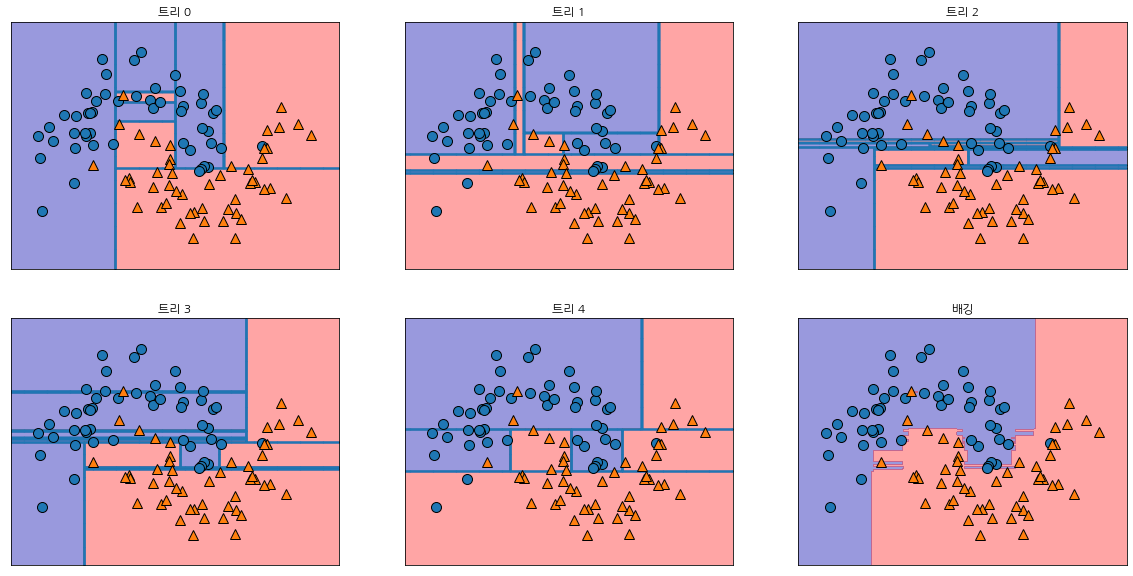

In [69]:
# 랜덤포레스트때처럼, 배깅 분류기에 있는 결정 트리의 결정 경계를 시각화
fig, axes = plt.subplots(2, 3, figsize = (20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), bagging_tree.estimators_)):
    # i < index, ax < axes.ravel_ Subplot 정보, tree < tree정보
    # 다차원 배열(array)을 1차원 배열로 평평하게 펴주는 NumPy의 ravel()
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm, ym, tree, ax=ax)
mglearn.plots.plot_2d_separator(bagging_tree, Xm, fill=True, ax=axes[-1,-1], alpha =.4)
axes[-1,-1].set_title('배깅')
mglearn.discrete_scatter(Xm[:, 0], Xm[:, 1], ym)
# axes[-1, -1] << 2,3 행렬 형태의 subplots 에서 -1행,-1열 (맨끝행, 맨끝열) 의미

In [71]:
# 결정트리 100개로 늘린후, 성능 확인

bagging_tree100 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, 
                                 n_jobs=-1, oob_score=True, random_state=42).fit(Xc_train, yc_train)

print('훈련 세트 정확도{:.3f}'.format(bagging_tree100.score(Xc_train, yc_train)))
print('테스트 세트 정확도{:.3f}'.format(bagging_tree100.score(Xc_test, yc_test)))
print('OOB 샘플의 정확도{:.3f}'.format(bagging_tree100.oob_score_))

훈련 세트 정확도1.000
테스트 세트 정확도0.965
OOB 샘플의 정확도0.951


## 배깅 정리

In [ ]:
# logistic 객체를 기반 분류기로 지정했을 때보다 스코어는 높으나, 훈련세트 1.0 < 과적합일지도..
# 배깅은 랜덤 포레스트와 달리 max_samples 매개변수에서 부트스트랩 샘플의 크기를 지정 할 수 있음
    # 랜덤 포레스트는 DecisionTreeClassifier(splitter='best')를 사용하도록 고정되어 있음
    # 배깅은 결정트리를 splitter = 'random'으로 설정하면 무작위로 분할한 후보 노드 중에서 최선을 찾음
    # 이런 결정 트리의 배깅 앙상블 > 엑스트라 트리와 관련이 깊음

# 엑스트라 트리